## 언제 지하철을 많이 이용할까?


In [1]:
import pandas as pd

In [2]:
file = './data/subway_raw.xlsx'

raw = pd.read_excel(file)
raw.head()

,사용일자,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자,요일
0,20190101,경춘선,1323,가평,1520,1436,20190104,화
1,20190101,경춘선,1322,상천,275,114,20190104,화
2,20190101,경춘선,1321,청평,1509,1083,20190104,화
3,20190101,경춘선,1320,대성리,357,271,20190104,화
4,20190101,경춘선,1319,마석,1772,1963,20190104,화


In [3]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99342 entries, 0 to 99341
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용일자    99342 non-null  int64 
 1   노선명     99342 non-null  object
 2   역ID     99342 non-null  int64 
 3   역명      99342 non-null  object
 4   승차총승객수  99342 non-null  int64 
 5   하차총승객수  99342 non-null  int64 
 6   등록일자    99342 non-null  int64 
 7   요일      99342 non-null  object
dtypes: int64(5), object(3)
memory usage: 6.1+ MB


### 가장 승객이 많은 날짜는?
pivot_table을 이용해 사용일자/ 요일별 승차승객수 합계 데이터를 정리한다.

In [6]:
data = raw.pivot_table(index = ['사용일자','요일'],
                       values = '승차총승객수',
                       aggfunc = 'sum')
data.head()

,,승차총승객수
사용일자,요일,
20190101,화,3419948
20190102,수,7621668
20190103,목,7873692
20190104,금,8270345
20190105,토,6062294


In [7]:
data.sort_values(by='승차총승객수',ascending=False)

,,승차총승객수
사용일자,요일,
20190503,금,9229899
20190510,금,9164243
20190524,금,9068976
20190517,금,9058227
20190412,금,9012472
...,...,...
20190206,수,3741895
20190101,화,3419948
20190203,일,3412440


> #### 5월에 지하철 승객수가 많은가?
> #### 금요일에 승색수가 많은가?

### 5월에 승객수가 많은가?

월별 승객수 비교가 필요하기 때문에 월 컬럼을 추가하도록 한다.

In [9]:
yearmonths = []
monthdays = []
for date in raw['사용일자']:
    yearmonths.append(str(date)[:6])
    monthdays.append(str(date)[4:])
    
raw['연월'] = yearmonths
raw['월일'] = monthdays
raw

,사용일자,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자,요일,연월,월일
0,20190101,경춘선,1323,가평,1520,1436,20190104,화,201901,0101
1,20190101,경춘선,1322,상천,275,114,20190104,화,201901,0101
2,20190101,경춘선,1321,청평,1509,1083,20190104,화,201901,0101
3,20190101,경춘선,1320,대성리,357,271,20190104,화,201901,0101
4,20190101,경춘선,1319,마석,1772,1963,20190104,화,201901,0101
...,...,...,...,...,...,...,...,...,...,...
99337,20190630,2호선,204,을지로4가,4940,4668,20190703,일,201906,0630
99338,20190630,2호선,203,을지로3가,12043,11854,20190703,일,201906,0630
99339,20190630,2호선,202,을지로입구,31622,29723,20190703,일,201906,0630
99340,20190630,2호선,201,시청,10178,8214,20190703,일,201906,0630


In [18]:
data = raw.pivot_table(index='연월',values ='승차총승객수',aggfunc='sum')

In [19]:
data.sort_values(by='승차총승객수',ascending=False)

,승차총승객수
연월,
201905,236267004
201901,221848014
201906,221547039
201904,218832085
201902,190335812
201903,157782643


2019년 5월이 가장 많은 총승객수를 기록한 것을 알 수 있습니다.

### 금요일에 가장 승객수가 많은가?

In [21]:
data = raw.pivot_table(index='요일',values ='승차총승객수',aggfunc='sum')
data.sort_values(by='승차총승객수',ascending=False)

,승차총승객수
요일,
금,214064383
화,198116552
목,197522587
월,187921393
수,176959733
토,157401217
일,114626732


금요일이 가장 많은 총승객수를 기록한 것을 알 수 있습니다.

### 월별로 편차가 존재하는지 확인

In [24]:
yearmonth = '201901'
cond = raw['연월'] == yearmonth
df_pruned = raw[cond]
df_pruned

,사용일자,노선명,역ID,역명,승차총승객수,하차총승객수,등록일자,요일,연월,월일
0,20190101,경춘선,1323,가평,1520,1436,20190104,화,201901,0101
1,20190101,경춘선,1322,상천,275,114,20190104,화,201901,0101
2,20190101,경춘선,1321,청평,1509,1083,20190104,화,201901,0101
3,20190101,경춘선,1320,대성리,357,271,20190104,화,201901,0101
4,20190101,경춘선,1319,마석,1772,1963,20190104,화,201901,0101
...,...,...,...,...,...,...,...,...,...,...
18329,20190131,1호선,155,동대문,14563,15139,20190203,목,201901,0131
18330,20190131,1호선,154,종로5가,30249,29703,20190203,목,201901,0131
18331,20190131,1호선,153,종로3가,36804,35050,20190203,목,201901,0131
18332,20190131,1호선,152,종각,51970,50080,20190203,목,201901,0131


In [26]:
data_jan = df_pruned.pivot_table(index=['월일','요일'],values ='승차총승객수',aggfunc='sum')
data_jan = data_jan.reset_index()
data_jan

,월일,요일,승차총승객수
0,0101,화,3419948
1,0102,수,7621668
2,0103,목,7873692
3,0104,금,8270345
4,0105,토,6062294
5,0106,일,4408718
6,0107,월,7824428
7,0108,화,7913162
8,0109,수,7815405
9,0110,목,7977300


### 시각화

In [27]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform
import seaborn as sns

if platform.system()=='Windows':
    font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
    rc('font',family=font_name)
    
matplotlib.rcParams['axes.unicode_minus'] = False

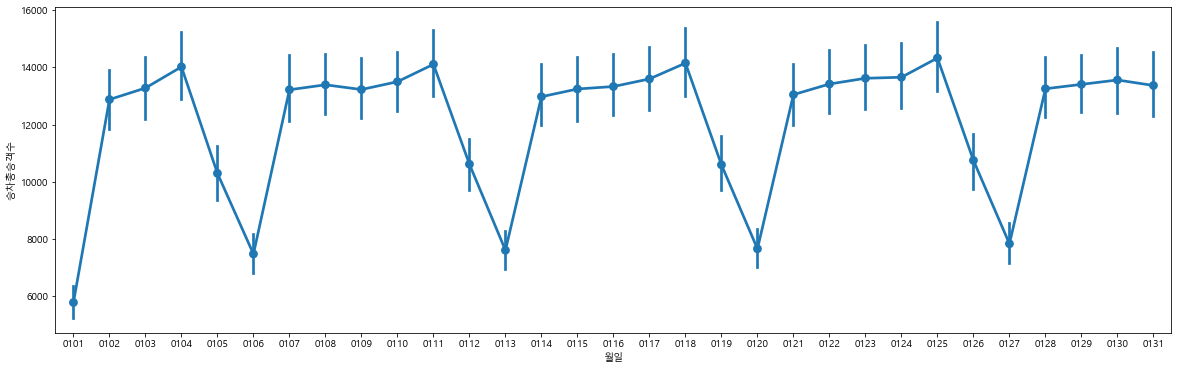

In [31]:
fig, ax = plt.subplots(figsize=(20,6))
sns.pointplot(data = df_pruned, x='월일', y='승차총승객수')

In [32]:
raw['연월'].unique()

array(['201901', '201902', '201903', '201904', '201905', '201906'],
      dtype=object)

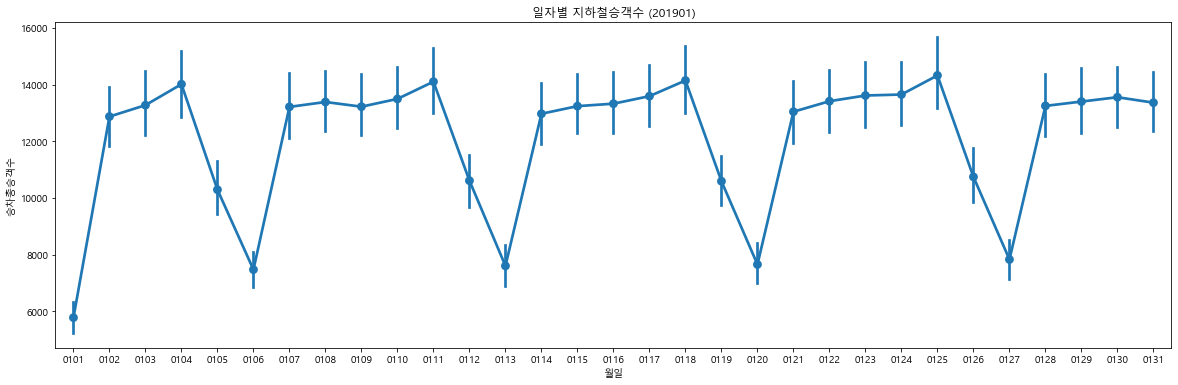

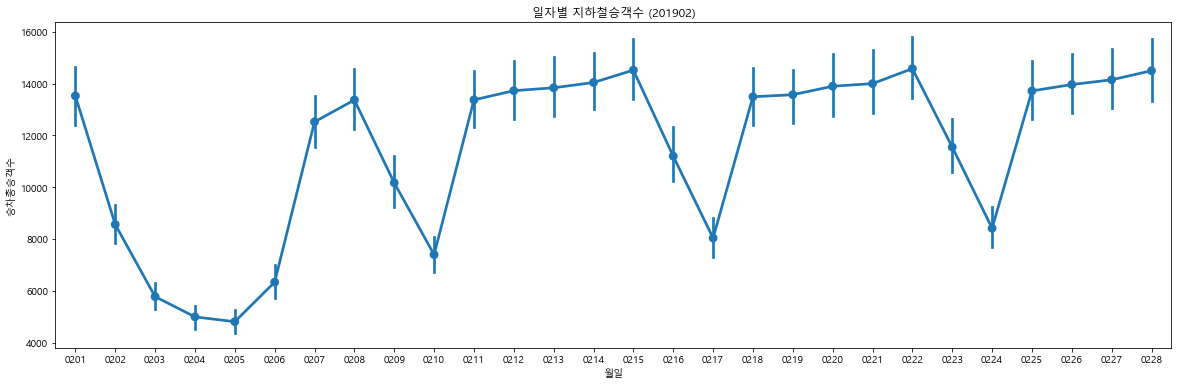

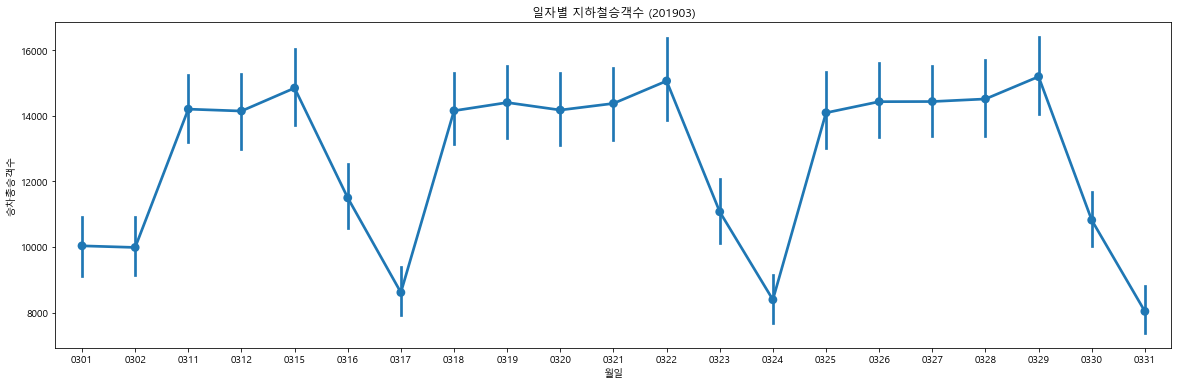

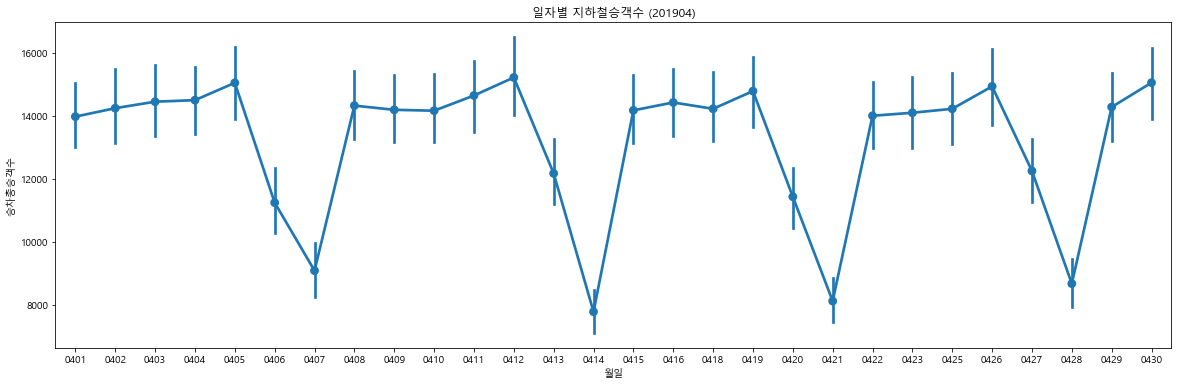

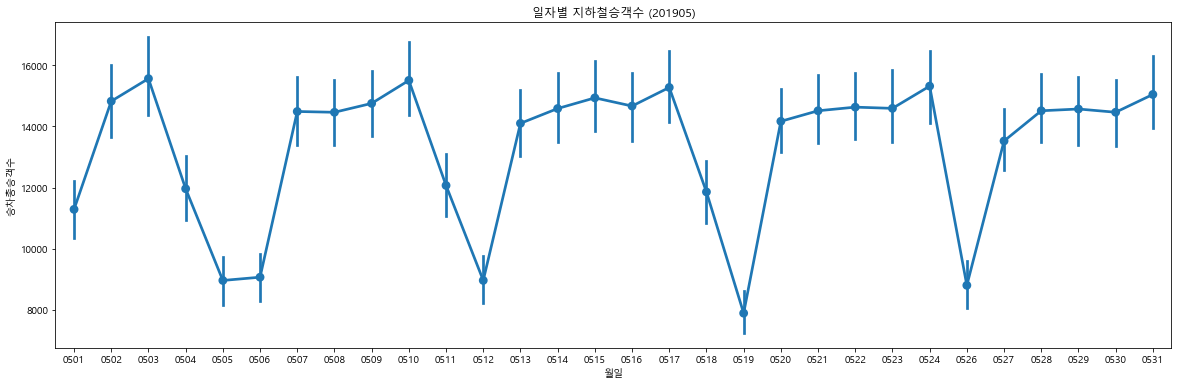

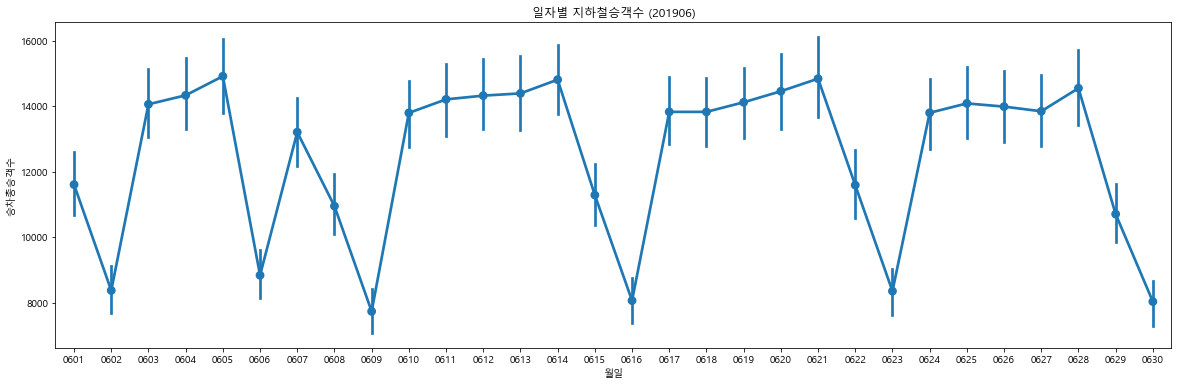

In [36]:
for yearmonth in raw['연월'].unique():
    cond = raw['연월'] == yearmonth
    df_pruned = raw[cond]
    
    data_jan = df_pruned.pivot_table(index=['월일','요일'],values ='승차총승객수',aggfunc='sum')
    data_jan = data_jan.reset_index()
    
    fig, ax = plt.subplots(figsize=(20,6))
    
    #그래프 제목짓기
    ax.set_title(f'일자별 지하철승객수 ({yearmonth})')
    sns.pointplot(data = df_pruned, x='월일', y='승차총승객수')

휴일인 경우에는 이용량이 줄어드는 것을 알 수 있다.